# Análisis de Riesgo Crediticio

## Importar bibliotecas

In [52]:
import os

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns  
# Configuración del estilo
sns.set_palette("husl")

import warnings
warnings.filterwarnings("ignore")

## Leer los datos

In [53]:
raw_data = pd.read_csv(os.path.join('..', 'data', 'input', 'loan.csv'))
raw_df = raw_data.copy(deep=True) # Estos son los datos sobre los cuales se trabajará
raw_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análisis Descriptivo y Exploratorio

### Exploración del dataset

In [54]:
raw_df.shape

(887379, 74)

In [55]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

El dataset contiene 887379 filas y 74 variables de las cuales 51 son numéricas y 23 son categóricas.

La variable target es _loan_status_

### Preprocesamiento

In [56]:
null_percentages = raw_df.isnull().mean() * 100

for column, percentage in null_percentages.items():
	if percentage:
		print({column: [round(percentage, 5), raw_df[column].dtype]})

{'emp_title': [5.79933, dtype('O')]}
{'emp_length': [5.05139, dtype('O')]}
{'annual_inc': [0.00045, dtype('float64')]}
{'desc': [85.79795, dtype('O')]}
{'title': [0.01724, dtype('O')]}
{'delinq_2yrs': [0.00327, dtype('float64')]}
{'earliest_cr_line': [0.00327, dtype('O')]}
{'inq_last_6mths': [0.00327, dtype('float64')]}
{'mths_since_last_delinq': [51.19706, dtype('float64')]}
{'mths_since_last_record': [84.5553, dtype('float64')]}
{'open_acc': [0.00327, dtype('float64')]}
{'pub_rec': [0.00327, dtype('float64')]}
{'revol_util': [0.05657, dtype('float64')]}
{'total_acc': [0.00327, dtype('float64')]}
{'last_pymnt_d': [1.99002, dtype('O')]}
{'next_pymnt_d': [28.50766, dtype('O')]}
{'last_credit_pull_d': [0.00597, dtype('O')]}
{'collections_12_mths_ex_med': [0.01634, dtype('float64')]}
{'mths_since_last_major_derog': [75.01597, dtype('float64')]}
{'annual_inc_joint': [99.94241, dtype('float64')]}
{'dti_joint': [99.94264, dtype('float64')]}
{'verification_status_joint': [99.94241, dtype('O')

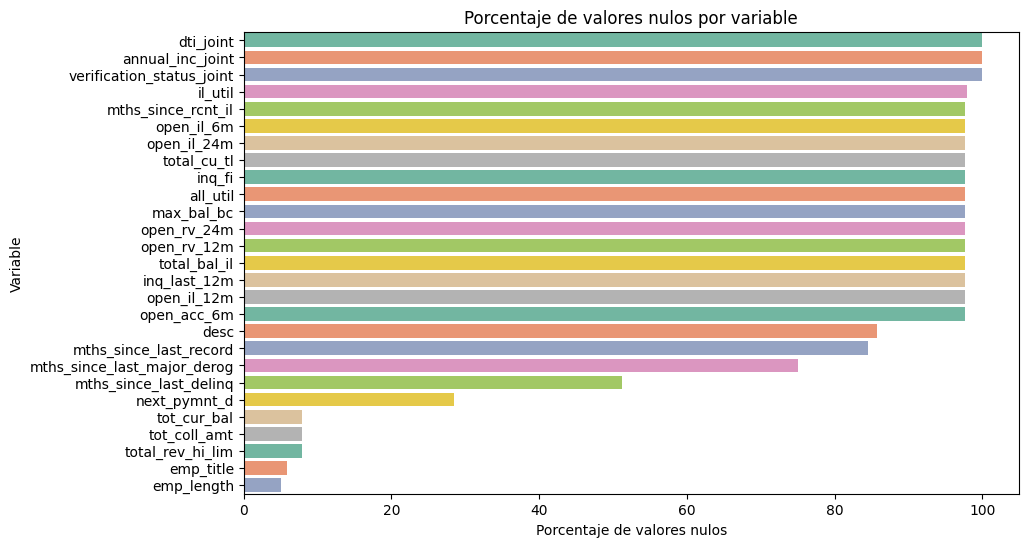

In [57]:
# Filtrar solo las columnas con más del 5% de valores nulos
null_percentages = null_percentages[null_percentages > 5].sort_values(ascending=False)

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentages.values, y=null_percentages.index, palette='Set2')

plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Variable')
plt.title('Porcentaje de valores nulos por variable')

plt.show()

Podemos evidenciar que hay un gran número de variables con alto porcentaje de valores nulos; estas variables no aportarían mucho en la construcción de un modelo, por lo que se decide eliminarlas.

In [58]:
columns_to_drop = [i for i in null_percentages.index if null_percentages[i] > 20]
raw_df.drop(columns=columns_to_drop, inplace=True)
raw_df.shape

(887379, 52)

In [59]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          887379 non-null  int64  
 1   member_id                   887379 non-null  int64  
 2   loan_amnt                   887379 non-null  float64
 3   funded_amnt                 887379 non-null  float64
 4   funded_amnt_inv             887379 non-null  float64
 5   term                        887379 non-null  object 
 6   int_rate                    887379 non-null  float64
 7   installment                 887379 non-null  float64
 8   grade                       887379 non-null  object 
 9   sub_grade                   887379 non-null  object 
 10  emp_title                   835917 non-null  object 
 11  emp_length                  842554 non-null  object 
 12  home_ownership              887379 non-null  object 
 13  annual_inc    

De esta manera, se eliminaron las variables cuyo porcentaje de valores nulos fuera mayor al 20%, quedándonos así con 52 variables, 32 numéricas y 20 categóricas.

Exploremos ahora un poco las variables categóricas.

In [60]:
for column in raw_df.columns:
    if raw_df[column].dtype == 'object':
        print(f'{column}: {len(raw_df[column].unique())}: {raw_df[column].unique()}')

term: 2: [' 36 months' ' 60 months']
grade: 7: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade: 35: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_title: 299272: [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'machining Cell Lead'
 'KYC Business Analyst' 'Manager Hotel Operations Oasis ']
emp_length: 12: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership: 6: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: 3: ['Verified' 'Source Verified' 'Not Verified']
issue_d: 103: ['Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-2011' 'Jul-2011'
 'Jun-2011' 'May-2011' 'Apr-2011' 'Mar-2011' 'Feb-2011' 'Jan-2011'
 'Dec-2010' 'Nov-2010' 'Oct-2010' 'Sep-2010' 'Aug-2010' 'Jul-2010'
 'Jun-2010' 'May-2010' 'Apr-2010' 'Mar-2010' 'Feb-2010' 'Jan-2010'
 'Dec-2009' 'Nov-2009' 'Oct-2009' 'Se

* term: se refiere al número de cuotas del préstamo.
* grade y subgrade: Calificación del préstamo. Subgrade da más información pero contiene muchos más niveles.
* emp_tittle: Trabajo de la persona que solicitó el préstamo; contiene demasiados niveles como para poder trabajar con ella.
* emp_lenght: Cuánto tiempo lleva la persona en su empleo.
* home_ownership: en qué tipo de casa vive
* issue_d: Fecha en la que se financió el préstamo; hay que cambiarle el tipo.
* loan_status: variable objetivo.
* payment_plan: indica si se ha implementado un plan de pago
* url: no aporta información
* purpose: motivo del préstamo
* title: título del préstamo
* zip_code: primeros 3 dígitos del código ZIP
* addr_state: Estado donde vive la persona
* earliest_cr_line: fecha en la que se abrió el primer credito; hay que cambiarle el tipo
* initial_list_status: estado inicial de la cotización del préstamo
* last_pymnt_d: fecha en la que se recibió el último pago; hay que cambiarle el tipo
* application_type: tipo de solicitud, si invidual o conjunta

In [61]:
colums_to_drop = ['id', 'member_id', 'url', 'title', 'addr_state', 'emp_title', 'verification_status', 'sub_grade', 'policy_code']
raw_df.drop(columns=colums_to_drop, inplace=True)

Cambiemos el tipo de datos de las variables de fechas.

In [62]:
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'])
raw_df['last_pymnt_d'] = pd.to_datetime(raw_df['last_pymnt_d'])
raw_df['last_credit_pull_d'] = pd.to_datetime(raw_df['last_credit_pull_d'])

Modificamos la variable zip_code para que sea numérica.

In [63]:
raw_df['zip_code'] = raw_df['zip_code'].str.replace('xx', '').astype(int)

In [64]:
raw_df.shape

(887379, 43)

In [65]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   887379 non-null  float64       
 1   funded_amnt                 887379 non-null  float64       
 2   funded_amnt_inv             887379 non-null  float64       
 3   term                        887379 non-null  object        
 4   int_rate                    887379 non-null  float64       
 5   installment                 887379 non-null  float64       
 6   grade                       887379 non-null  object        
 7   emp_length                  842554 non-null  object        
 8   home_ownership              887379 non-null  object        
 9   annual_inc                  887375 non-null  float64       
 10  issue_d                     887379 non-null  datetime64[ns]
 11  loan_status                 887379 non-

Ahora, contamos con 43 variables: 30 numéricas, 10 categóricas y 3 temporales

Finalmente, convirtamos nuestra variable a una codificación binaria donde:
* 0: Clientes buenos, aquellos que SÍ pagaron su crédito
* 1: Clientes malos, aquellos que NO pagaron su crédito

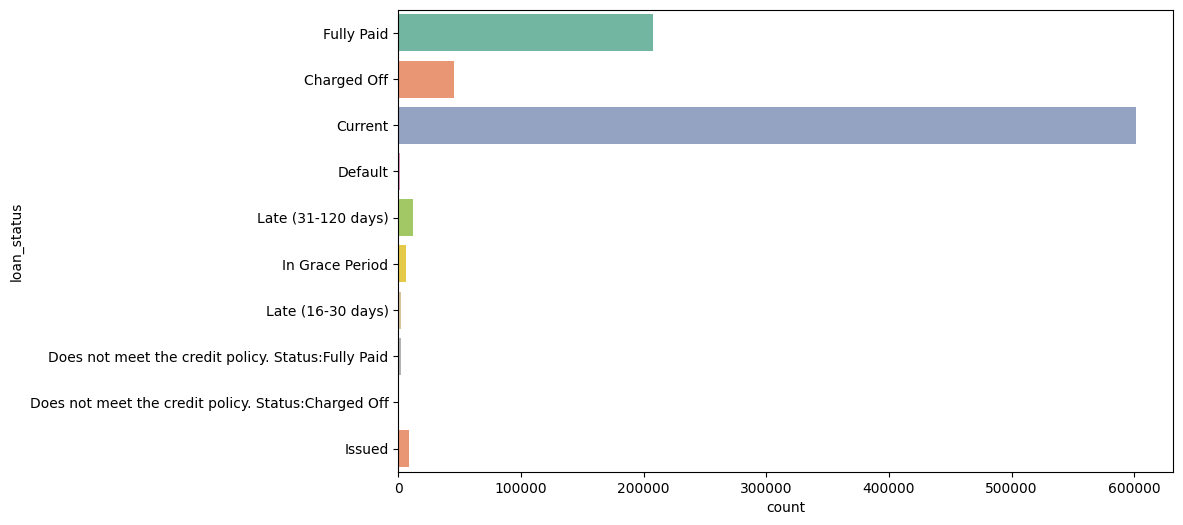

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(y='loan_status', data=raw_df, palette='Set2')
plt.show()

- 0: Current: estos clientes están al día. No sabemos si tuvieron atrasos y ya se normalizaron o si van a incumplir en el futuro. Solo sabemos que están al día.
- 1: Fully paid: estos clientes ya pagaron sus créditos. De estos sabemos que son buenos pagadores.
- 2: Charged off: son créditos que los otorgantes ya han reconocido como incobrables y los asumen perdidos. Aquí sabemos que son malos.
- 3: Late (31-120): estos son créditos que tienen un atraso entre los 31 y los 120 días. Ahora, son cosas muy diferentes 30 días que 120 días. Si mi modelo busca identificar solo malos pagadores, aquí aún no estamos seguros de que no se pondrán al corriente. Hay dos opciones: a) se marcan como indeterminados y se asume que en la nueva variable binaria son NA o b) se marcan como malos y en la nueva variable binaria se asume que son 1. Con la opción b la categoría de malos del modelo se entendería como clientes que tienen un atraso de más de 30 días (no es realmente muy práctico, a cualquiera se le puede olvidar hacer un pago un mes).
- 4: Issued: el crédito se aprobó. Esta categoría no dice nada para nuestro problema y se marcaría como NA.
- 5: In Grace Period: esos créditos están en periodo de gracia, así que aún los acreditados no están obligados a hacer pagos. Son NA porque no sabemos cómo van a comportarse cuando se acabe el periodo de gracia.
- 6: Late (16-30 days): estos clientes tienen un atraso entre 16 y 30 días. No sabemos cómo se comportarán. Son NAs.
- 7: Does not meet the credit policy. Status:Fully Paidy: no cumple con los requisitos para que se apruebe el crédito, pero este crédito se pagó. O sea es un 0.
- 8: Default: esto es impago. Estamos seguros de que son malos. Serían un 1 en la nueva variable binaria.
- 9: Does not meet the credit policy. Status:Charged Off: no cumple con los requisitos para que se apruebe el crédito, y este crédito no se pagó. O sea es un 1.

Teniendo en cuenta lo anterior, nuestra variable objetivo se define como:
- Clientes buenos (0): Aquellos que ya completaron el pago del crédito (Fully Paid, Does not meet the credit policy. Status: Fully Paid).
- Clientes malos (1): Aquellos con créditos declarados en impago total (Charged Off, Default, Does not meet the credit policy. Status: Charged Off).
- Clientes con estatus NA:
  - Current: No sabemos si incumplirán en el futuro.
  - Late (16-30) y Late (31-120): Son atrasos moderados, pero no podemos asegurar que terminen en impago.
  - Issued, In Grace Period: Aún no tienen historial de pago.

In [67]:
mapeo_target = {
	"Fully Paid" : 0,
	"Does not meet the credit policy. Status: Fully Paid" : 0,
	"Charged Off" : 1,
	"Does not meet the credit policy. Status: Charged Off" : 1,
	"Default" : 1,
	"Current" : pd.NA,
	"Late (31-120 days)" : pd.NA,
	"Late (16-30 days)" : pd.NA,
	"In Grace Period" : pd.NA,
	"Issued" : pd.NA
}

raw_df['target'] =  raw_df['loan_status'].map(mapeo_target)

In [68]:
raw_df.shape

(887379, 44)

In [69]:
raw_df.drop(columns=['loan_status'], inplace=True)
raw_df.dropna(subset=['target'], inplace=True)

In [70]:
raw_df.shape

(254190, 43)

In [71]:
raw_df['target'].value_counts(normalize=True)

target
0    0.817196
1    0.182804
Name: proportion, dtype: float64

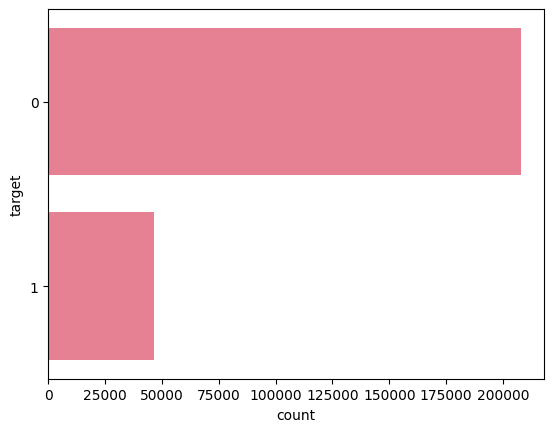

In [72]:
sns.countplot(data=raw_df, y="target")
plt.show()

De esta manera, quedamos con 254190 datos, donde el 81.8% son buenos clientes y el 18.2% son malos clientes.

### Visualizaciones

#### Variables Categóricas

Comencemos visualizando la distribución de las variables categóricas.

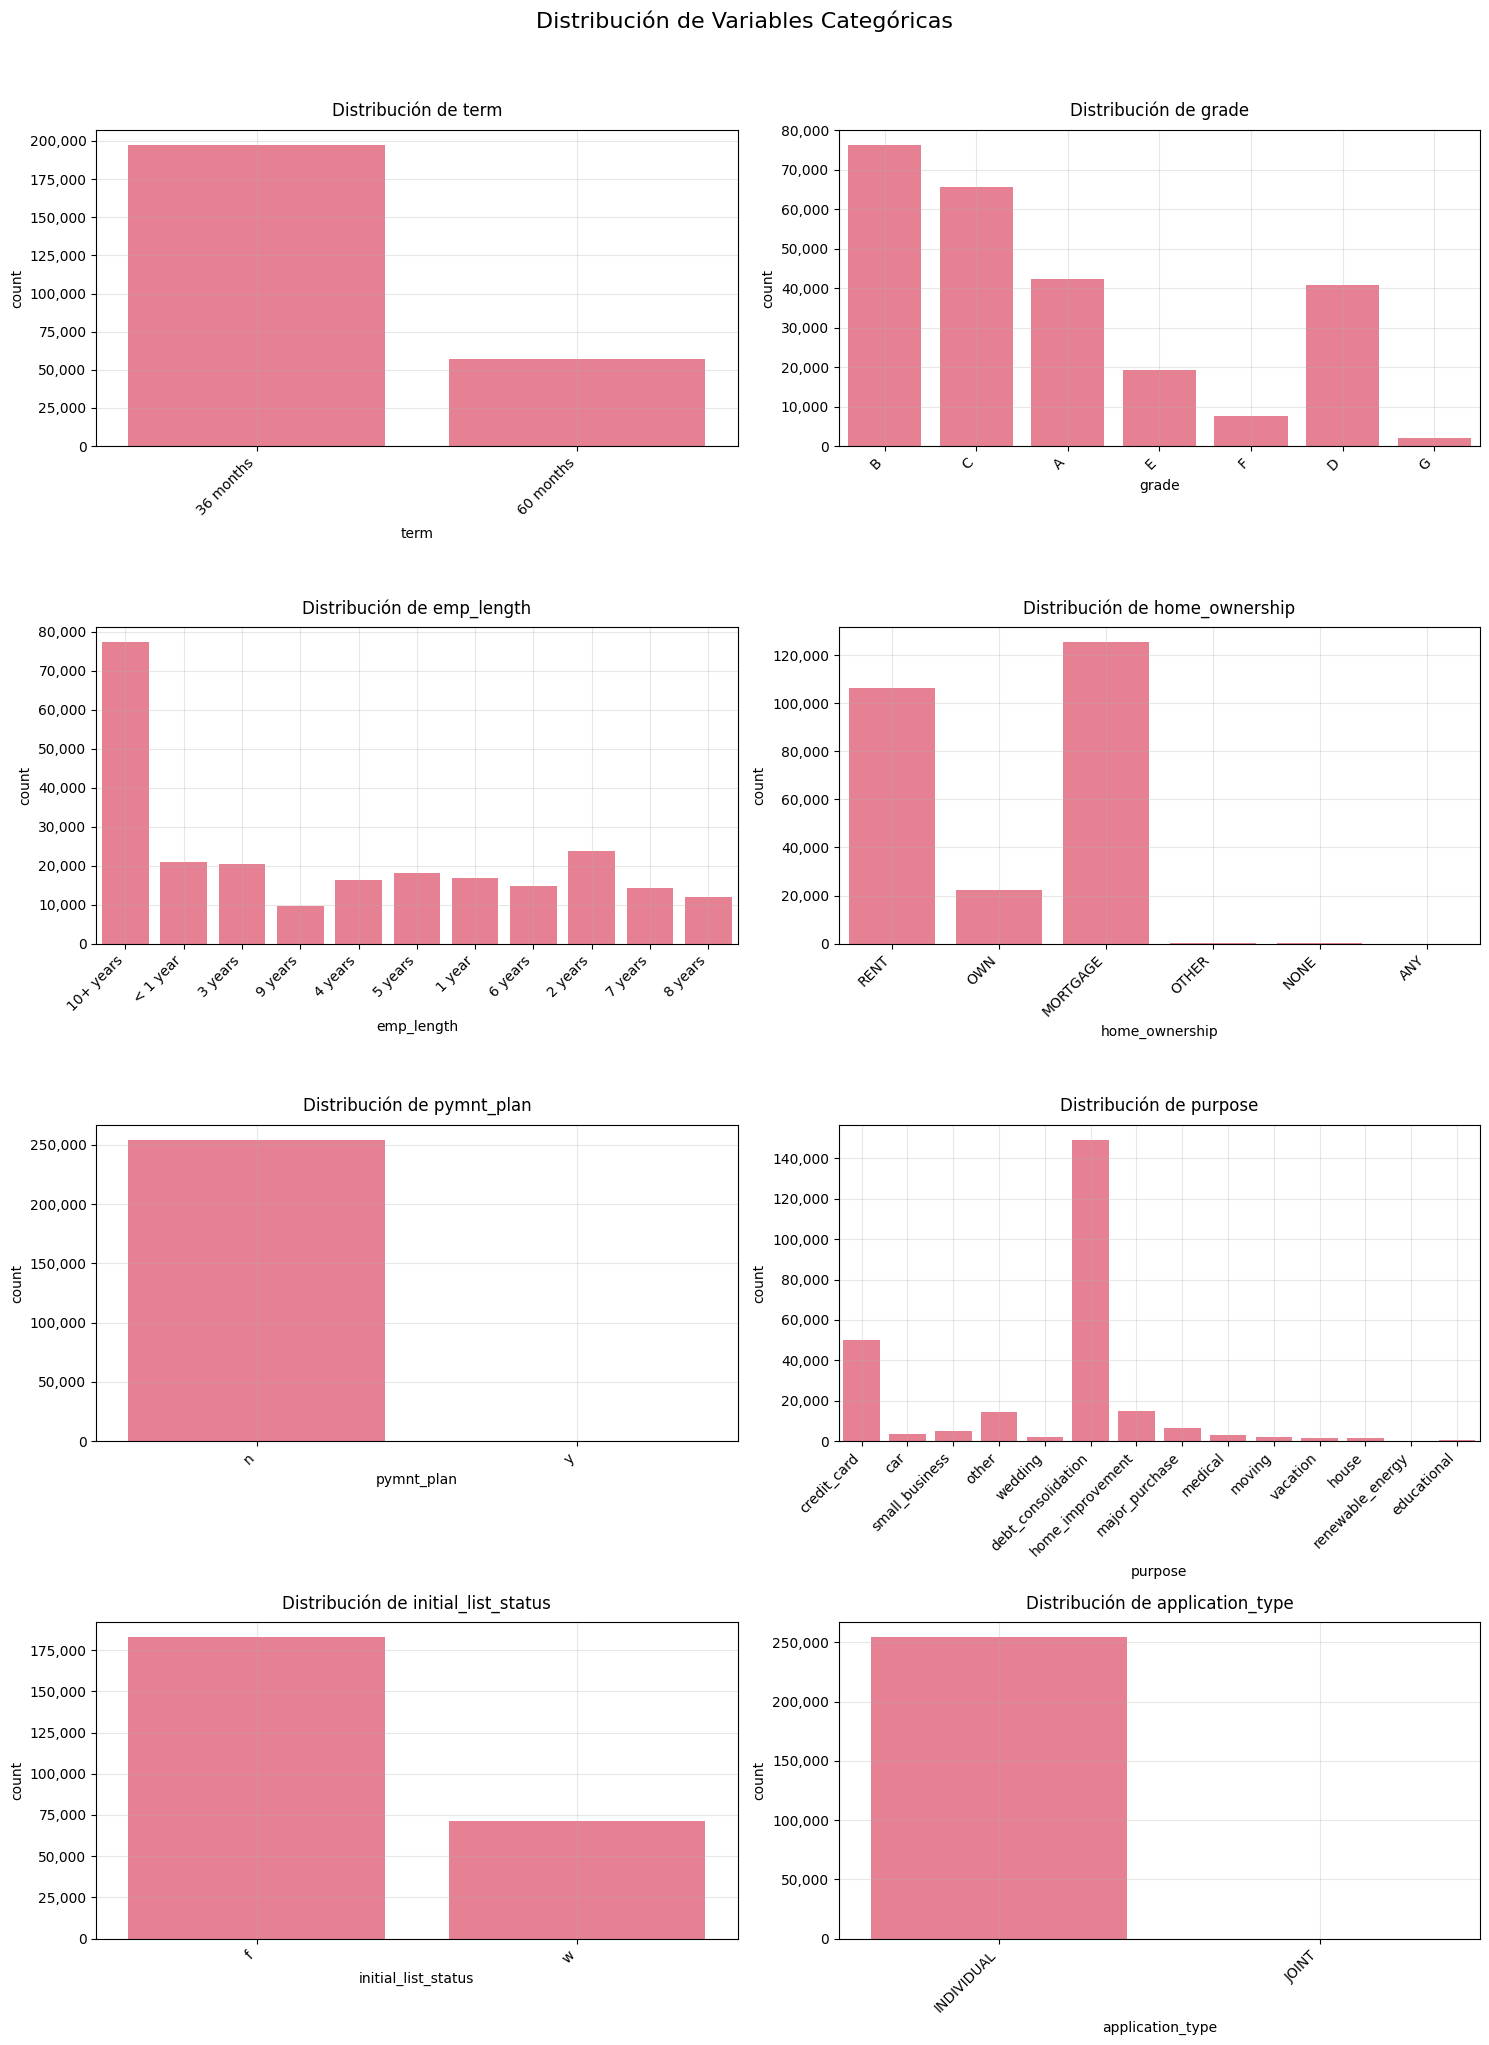

In [73]:
# Configuración del estilo
sns.set_palette("husl")

# Obtener columnas categóricas excluyendo loan_status
cat_columns = [col for col in raw_df.select_dtypes(include='object').columns 
            	if col != 'target']

# Crear subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, y=1.02)

# Iterar sobre las columnas
for i, column in enumerate(cat_columns):
    ax = axes[i // 2, i % 2]
    
    # Crear countplot
    sns.countplot(data=raw_df, x=column, ax=ax)
    
    # Personalizar cada subplot
    ax.set_title(f'Distribución de {column}', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    
    # Formatear etiquetas del eje y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustar layout
plt.tight_layout()
plt.show()

Podemos observar que las variables de application_type pymnt_plan están extremadamente desequilibrada, por lo que podría ser mejorar eliminarlas.

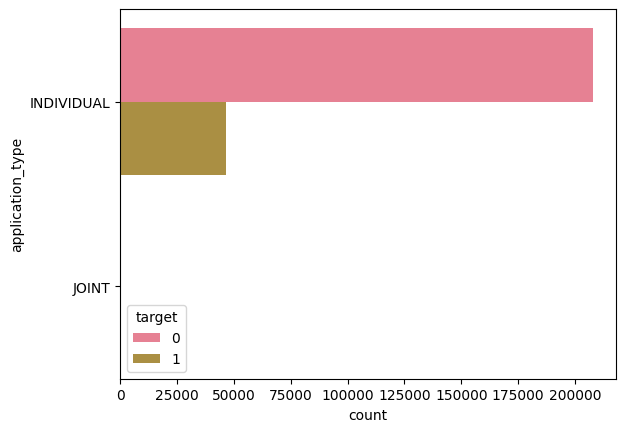

In [74]:
sns.countplot(data=raw_df, y="application_type", hue="target")
plt.show()

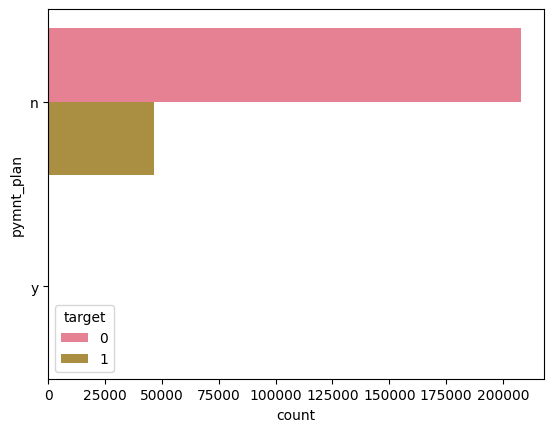

In [75]:
sns.countplot(data=raw_df, y="pymnt_plan", hue="target")
plt.show()

Vemos que application_type y pymnt_plan no aportan mucha información, así que las eliminaremos.

In [76]:
raw_df = raw_df.drop(columns=["pymnt_plan", "application_type"])

Observemos cómo se distribuyen las variables categóricas si las segmentamos por nuestra variable target.

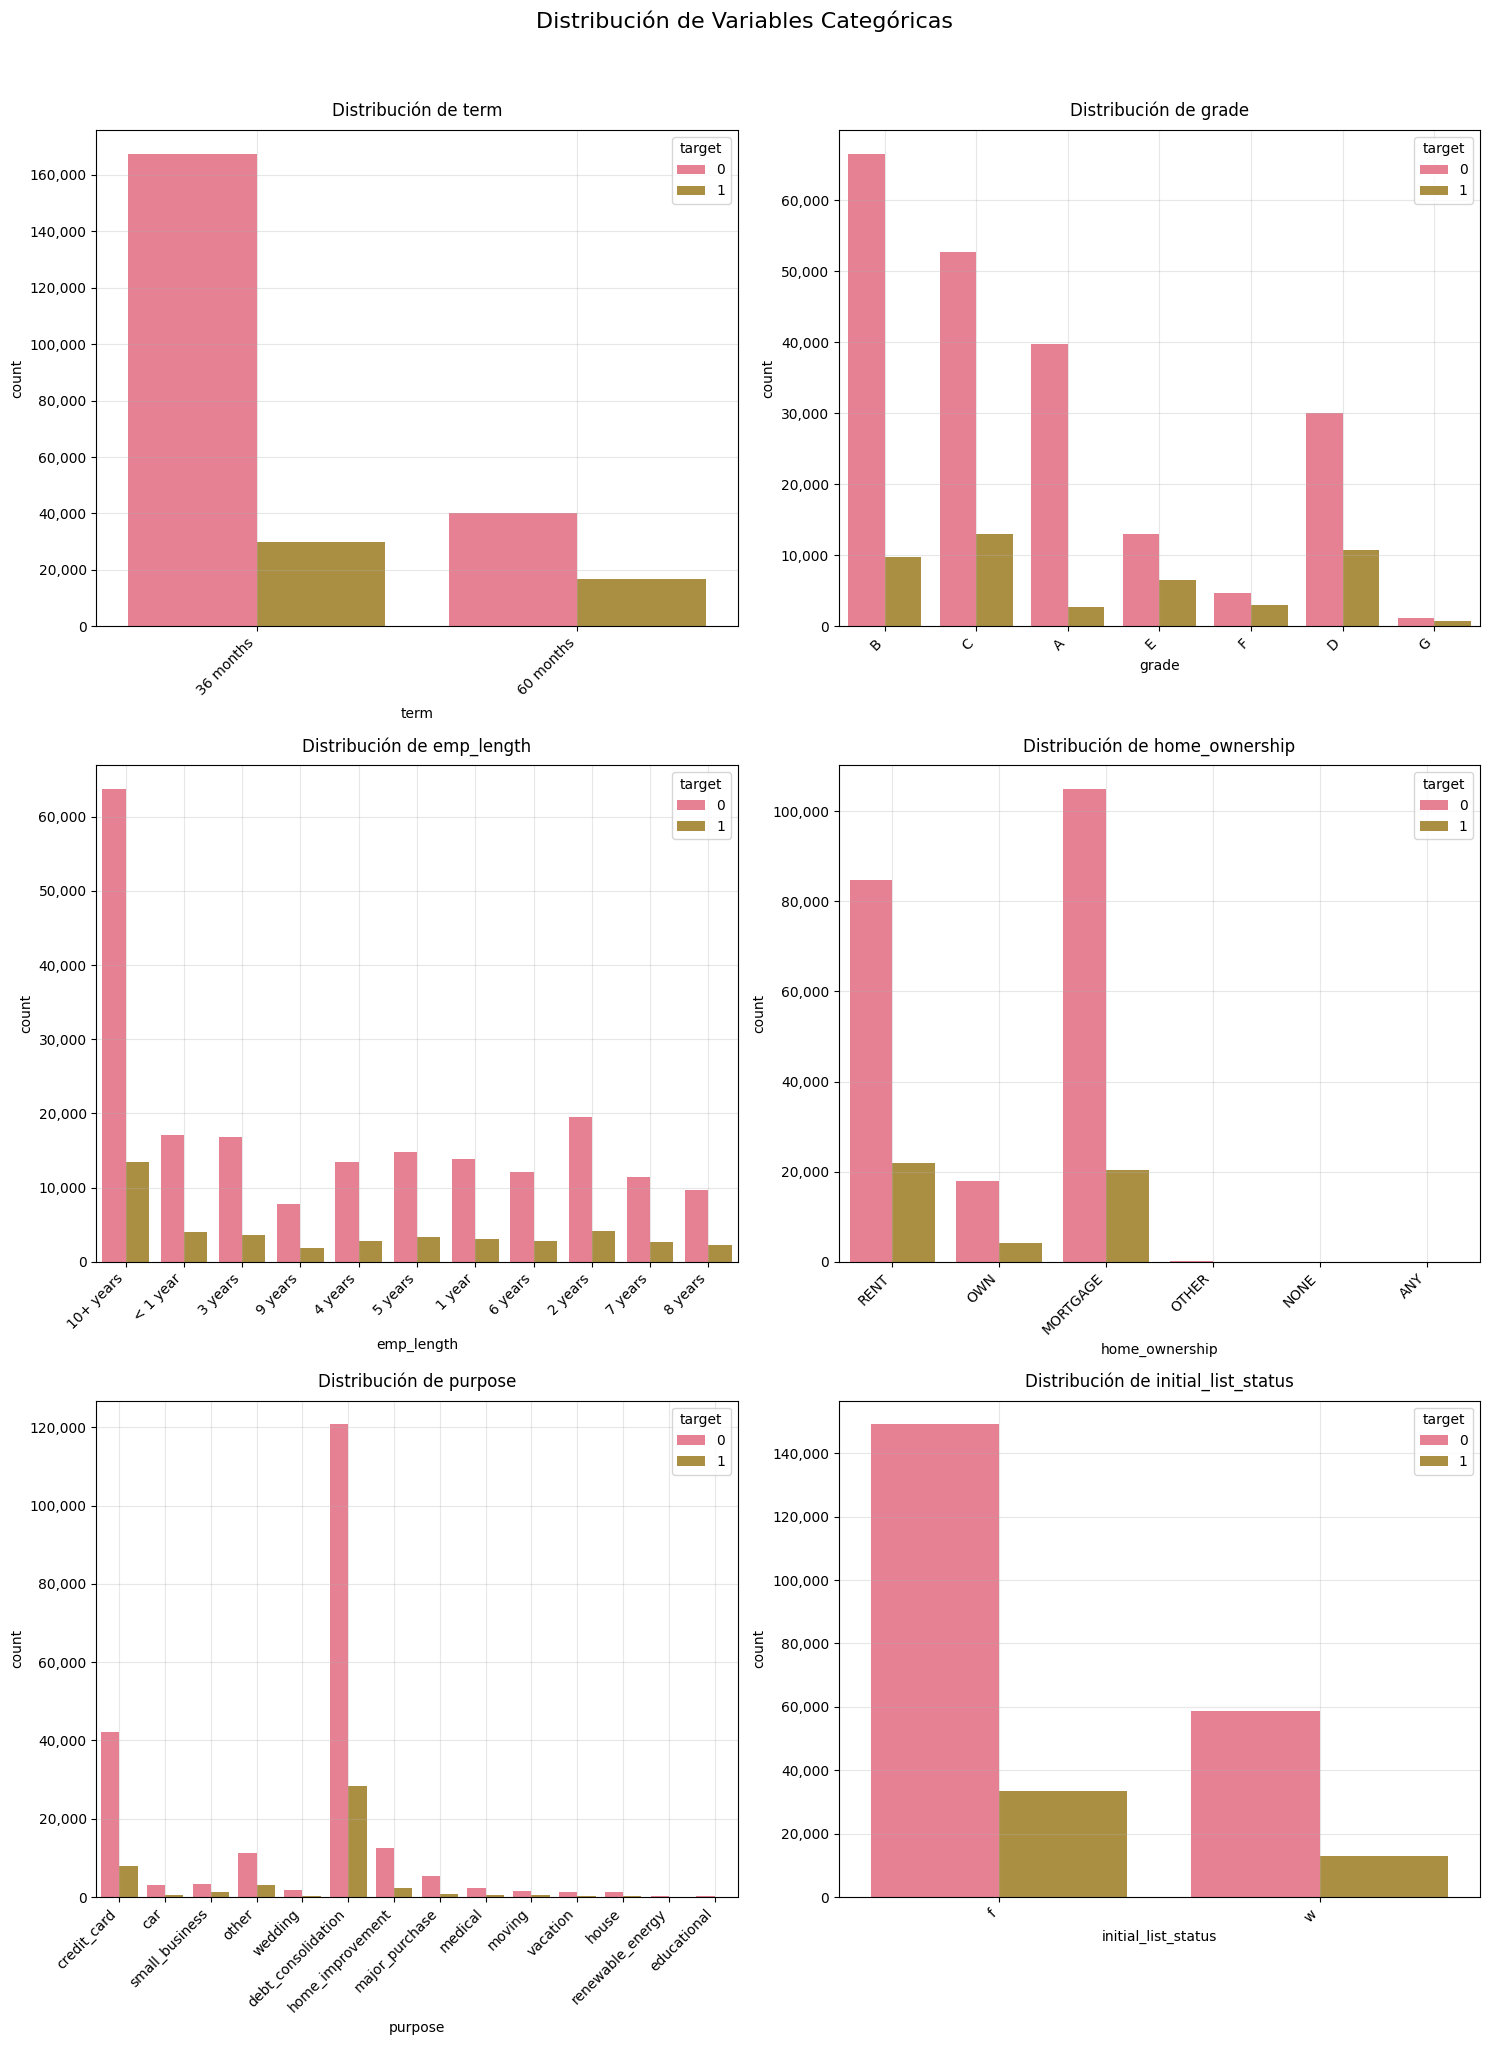

In [77]:
# Obtener columnas categóricas excluyendo loan_status y target
cat_columns = [col for col in raw_df.select_dtypes(include='object').columns 
            	if col != 'loan_status' and col != 'target']

# Crear subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, y=1.02)

# Iterar sobre las columnas
for i, column in enumerate(cat_columns):
    ax = axes[i // 2, i % 2]
    
    # Crear countplot
    sns.countplot(data=raw_df, x=column, hue='target', ax=ax)
    
    # Personalizar cada subplot
    ax.set_title(f'Distribución de {column}', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    
    # Formatear etiquetas del eje y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustar layout
plt.tight_layout()
plt.show()

Podemos sacar conclusiones interesantes sobre las personas que incumplen los pagos:
* term: mayor porcentaje en 36 meses.
* grade: mayor cantidad en D, C, B y E.
* emp_lenth: mayor proporción en 10+ años
* home_ownership: viven en casas rentadas o con hipoteca
* purpose: el principal motivo del préstamo es la consolidación de débito y la tarjeta de crédito
* initial_status: mayor proporción en estado _f_

#### Variables numéricas

Pasemos ahora a las variables numéricas

In [78]:
numerical_columns = raw_df.select_dtypes(include=['float']).columns
numerical_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

* loan_amnt: cantidad del préstamo
* funded_amnt: cantidad comprometida al préstamo
* funded_amnt_inv: cantidad comprometida por los inversionistas para el préstamo
* int_rate: tasa de interés
* installment: El pago mensual adeudado por el prestatario si se origina el préstamo
* annual_inc: ingresos anuales del prestatario
* dti: Un índice calculado utilizando los pagos mensuales totales de la deuda del prestatario sobre las obligaciones totales de la deuda, excluyendo la hipoteca y el préstamo LC solicitado, dividido por los ingresos mensuales declarados por el prestatario.
* delinq_2yrs: El número de incidencias de morosidad de más de 30 días en el archivo de crédito del prestatario durante los últimos 2 años.
* inq_last_6mths: El número de consultas en los últimos 6 meses (excluyendo consultas sobre automóviles e hipotecas)
* open_acc: El número de líneas de crédito abiertas en el expediente de crédito del prestatario.
* pub_rec: Número de registros públicos despectivos
* revol_bal: Saldo rotativo total del crédito
* revol_util: Tasa de utilización de la línea renovable, o la cantidad de crédito que utiliza el prestatario en relación con todo el crédito renovable disponible.
* total_acc: El número total de líneas de crédito actualmente en el archivo de crédito del prestatario.
* out_prncp: Principal pendiente restante para el monto total financiado
* out_prncp_inv: Principal pendiente restante por parte del monto total financiado por inversionistas
* total_pymnt: Pagos recibidos hasta la fecha por el monto total financiado
* total_pymnt_inv: Pagos recibidos hasta la fecha por parte del monto total financiado por inversores
* total_rec_prncp: Principal recibido hasta la fecha
* total_rec_int: Interes recibido hasta la fecha
* total_rec_late_fee: Cargos por pagos atrasados ​​recibidos hasta la fecha
* recoveries: cargo posterior a la recuperación bruta
* collection_recovery_fee: cargo posterior a la tarifa de cobro
* last_pymnt_amnt: Último importe total del pago recibido
* collections_12_mths_ex_med: Número de cobros en 12 meses excluyendo cobros médicos
* acc_now_delinq: El número de cuentas en las que el prestatario está actualmente en mora.
* tot_coll_amt: Montos totales de cobranza adeudados
* tot_cur_bal: Saldo actual total de todas las cuentas
* total_rev_hi_lim: Crédito alto rotativo total/límite de crédito

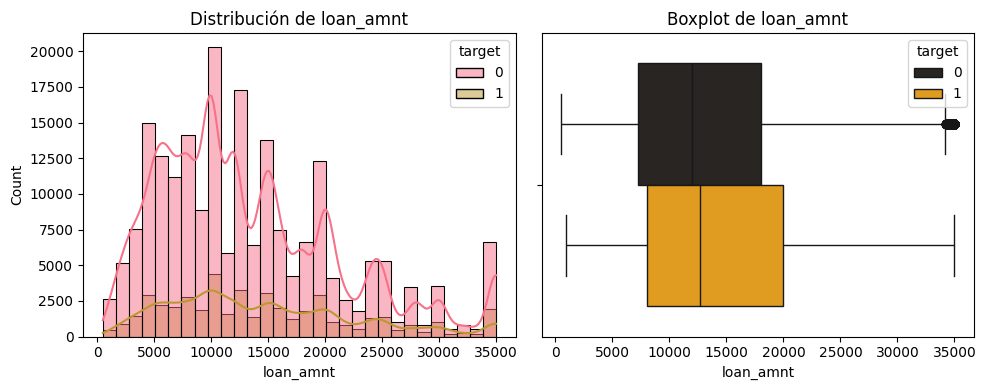

loan_amnt tiene 8129 outliers.


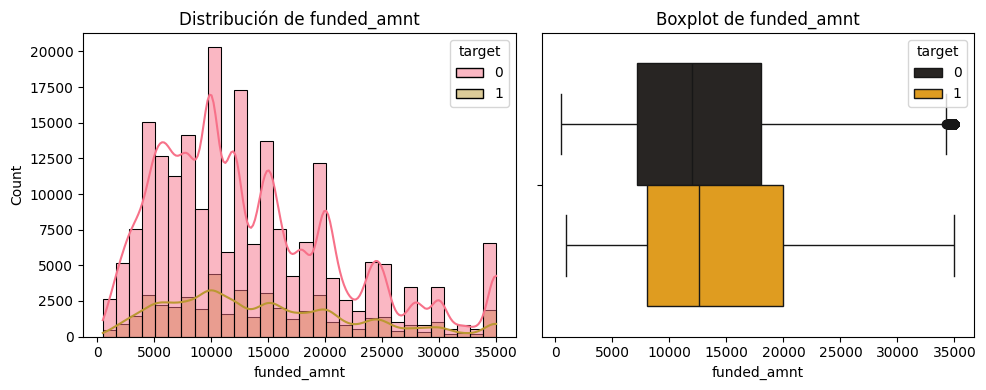

funded_amnt tiene 8055 outliers.


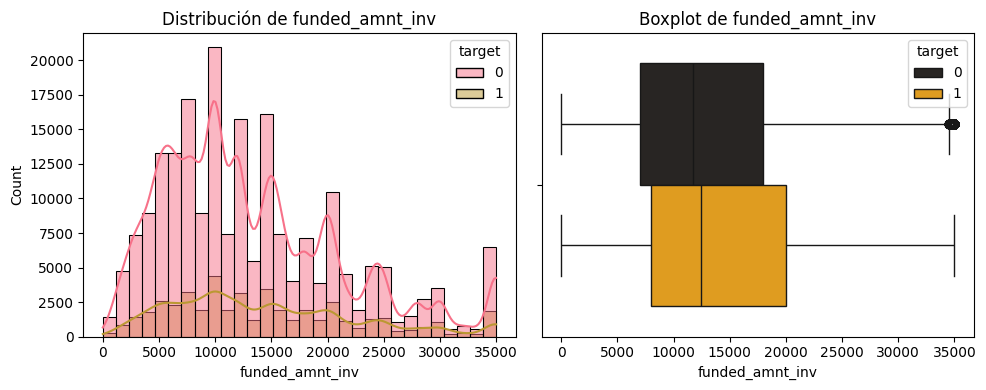

funded_amnt_inv tiene 8103 outliers.


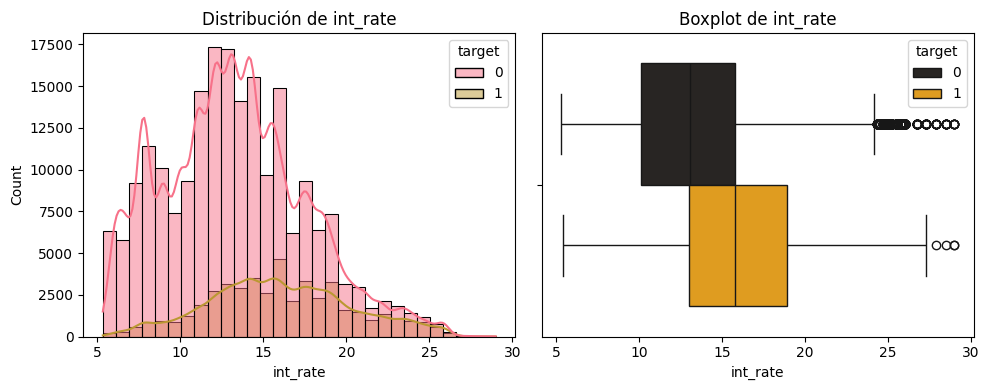

int_rate tiene 1911 outliers.


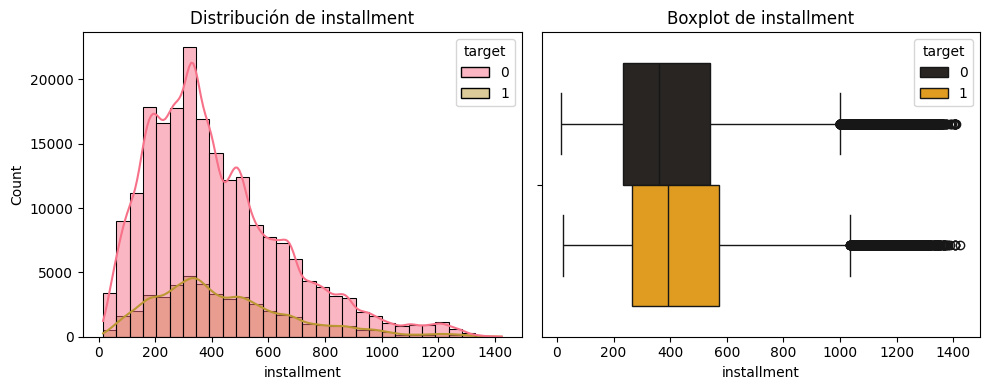

installment tiene 7031 outliers.


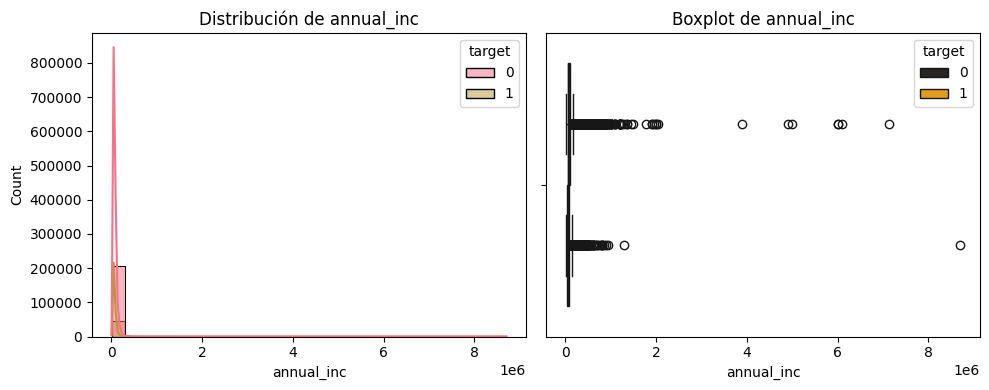

annual_inc tiene 10592 outliers.


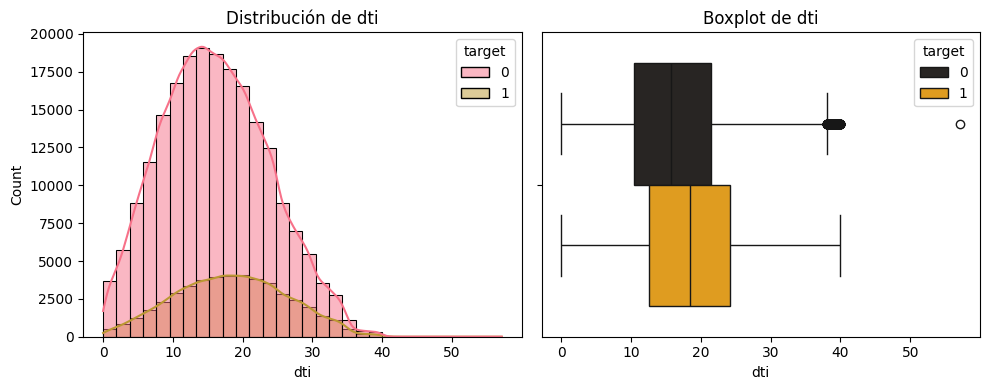

dti tiene 290 outliers.


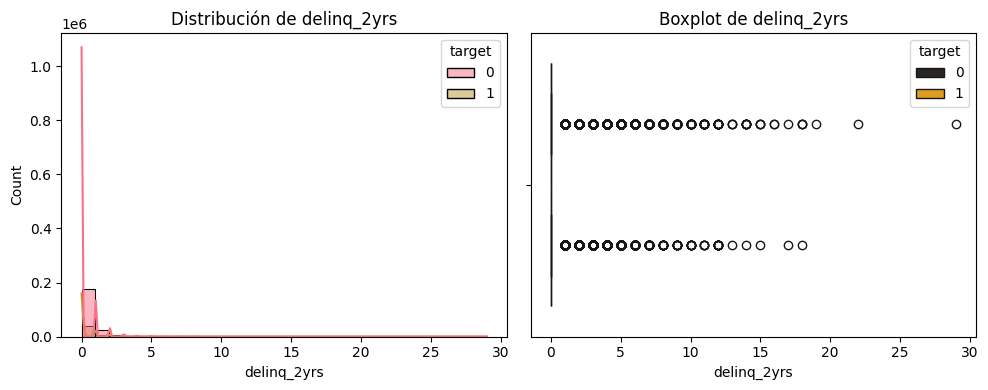

delinq_2yrs tiene 40980 outliers.


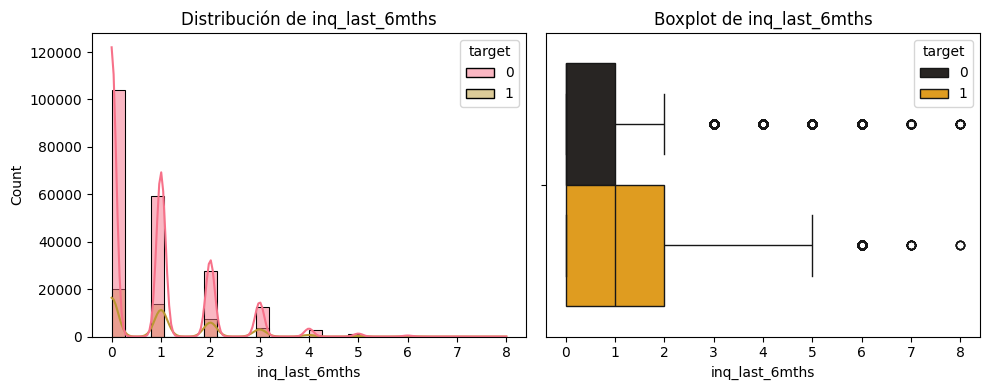

inq_last_6mths tiene 21818 outliers.


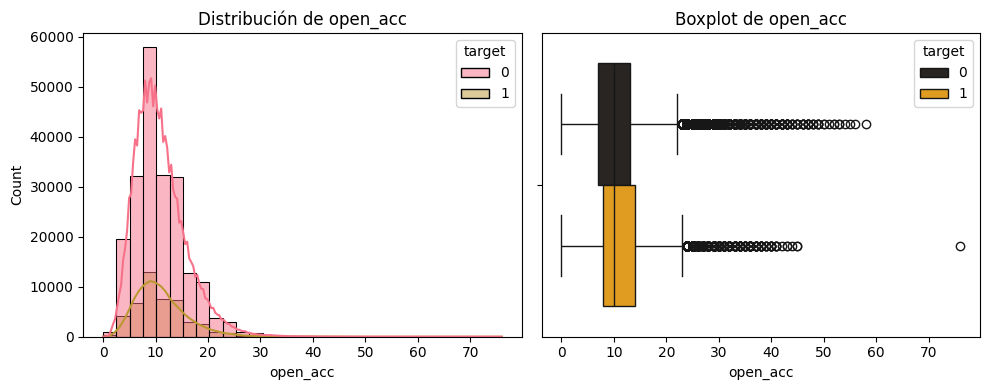

open_acc tiene 3702 outliers.


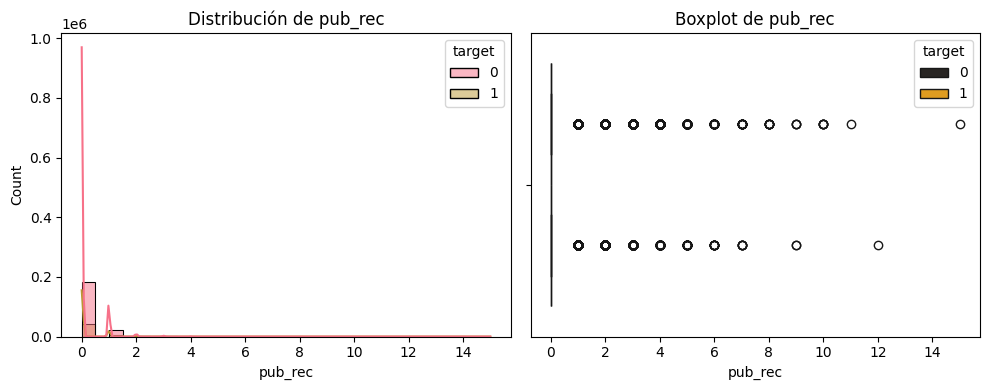

pub_rec tiene 31144 outliers.


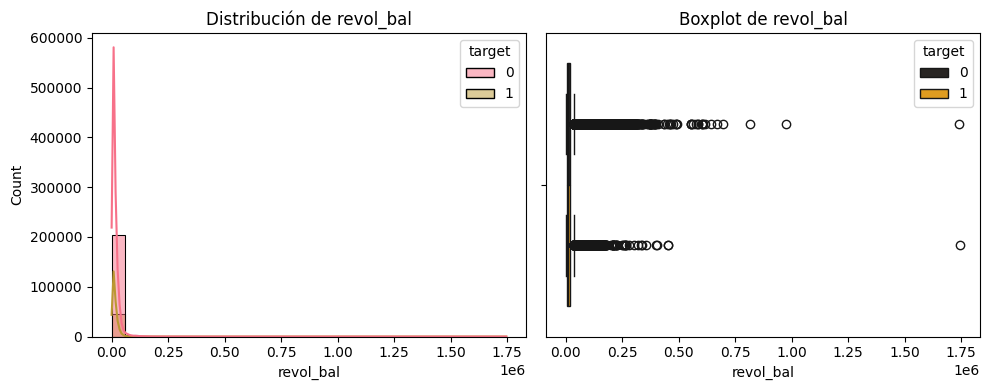

revol_bal tiene 13116 outliers.


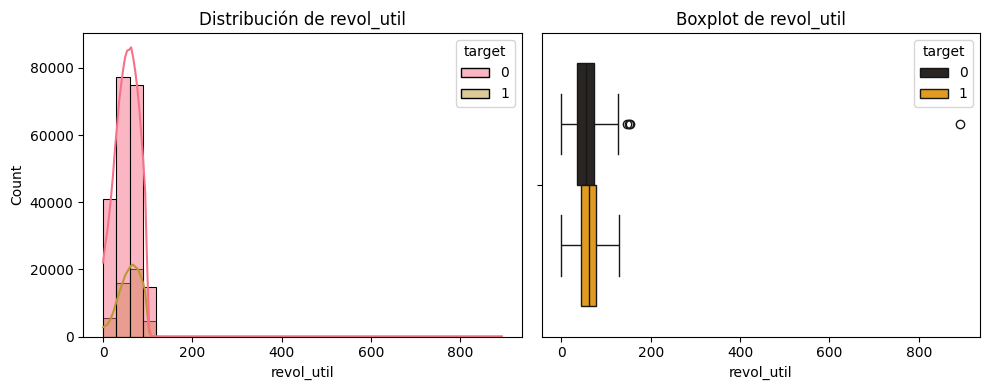

revol_util tiene 4 outliers.


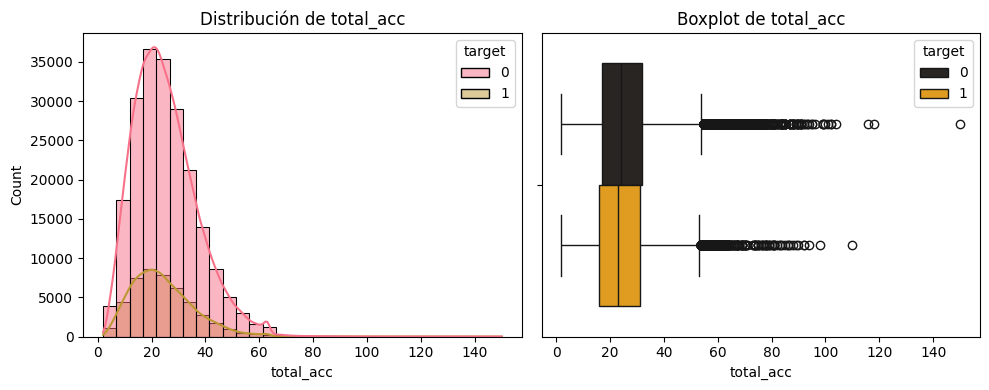

total_acc tiene 3854 outliers.


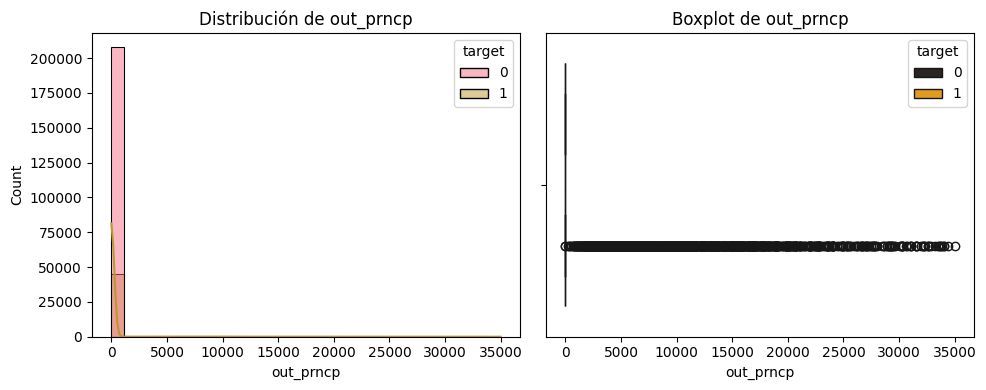

out_prncp tiene 1218 outliers.


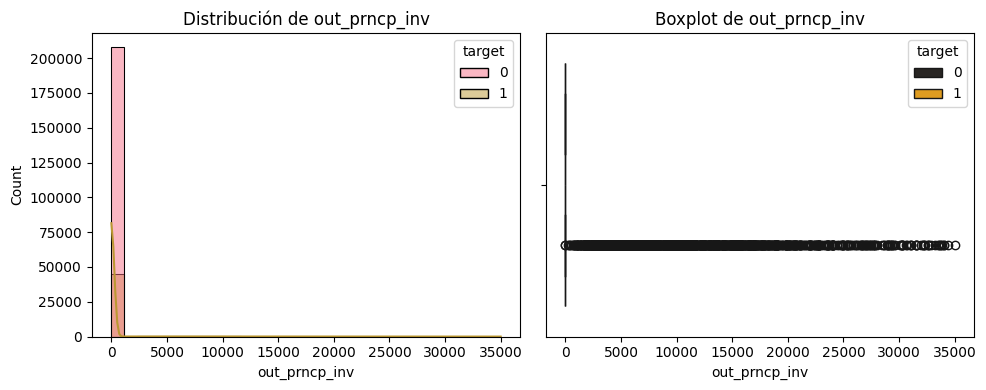

out_prncp_inv tiene 1218 outliers.


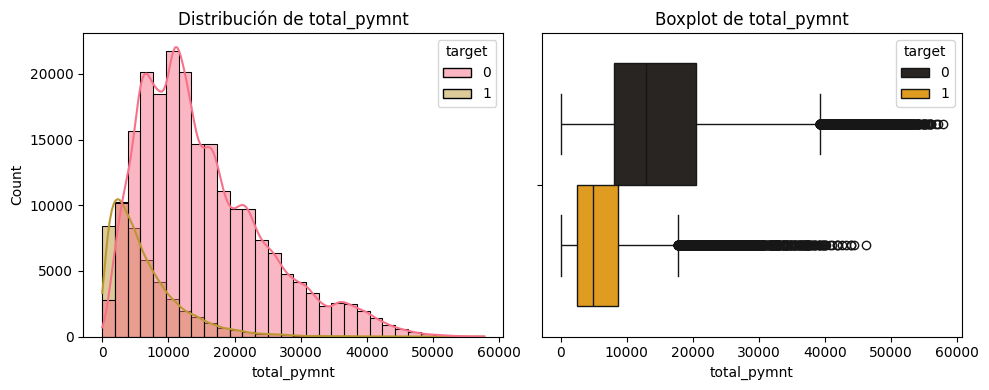

total_pymnt tiene 7663 outliers.


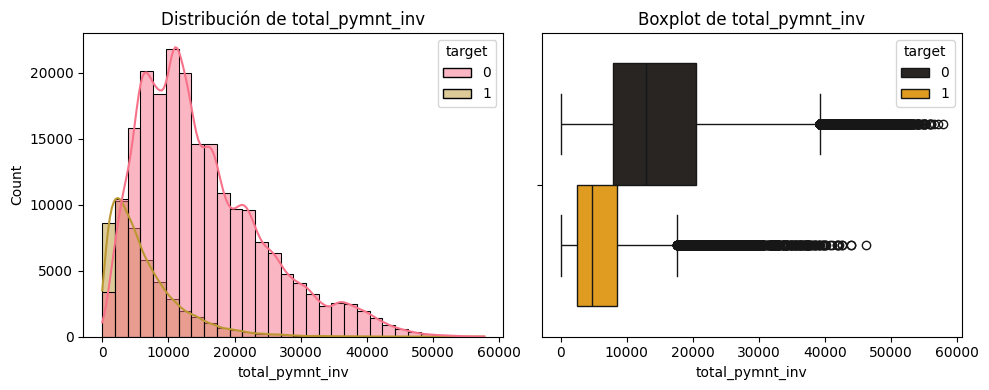

total_pymnt_inv tiene 7769 outliers.


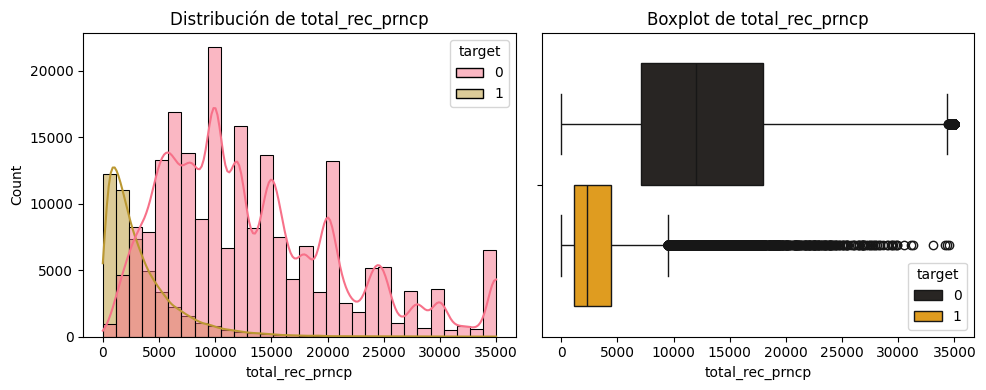

total_rec_prncp tiene 7105 outliers.


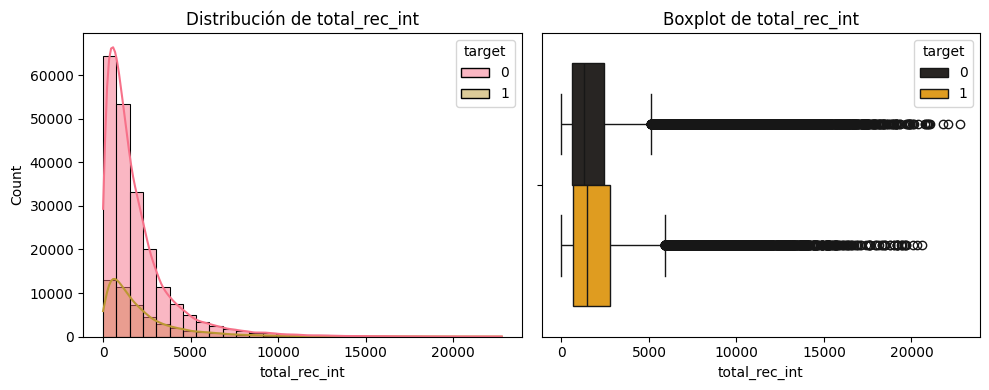

total_rec_int tiene 17197 outliers.


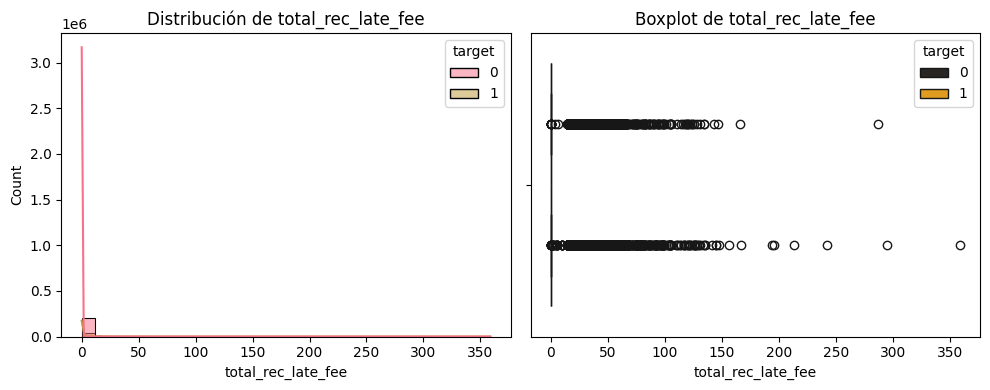

total_rec_late_fee tiene 6622 outliers.


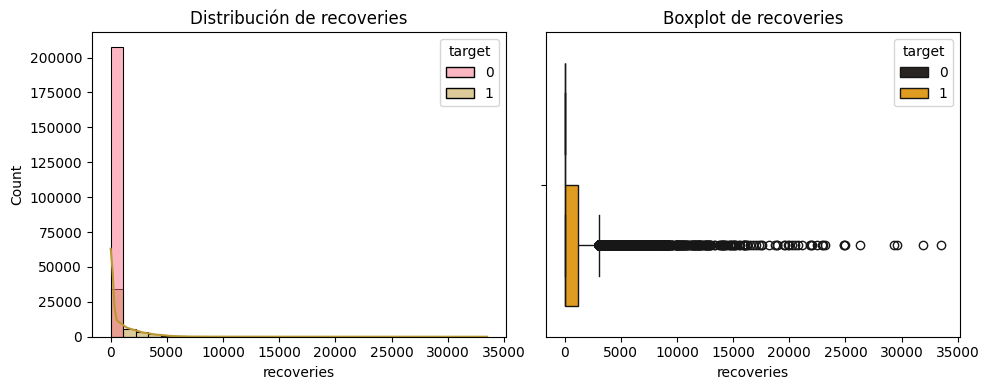

recoveries tiene 24187 outliers.


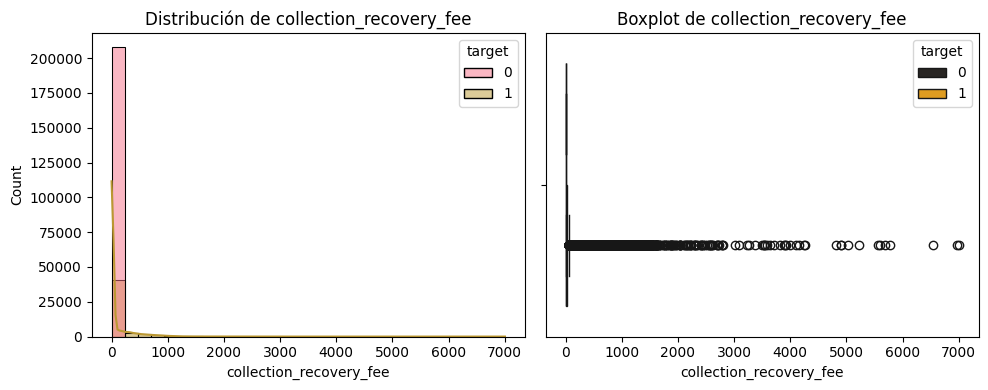

collection_recovery_fee tiene 23035 outliers.


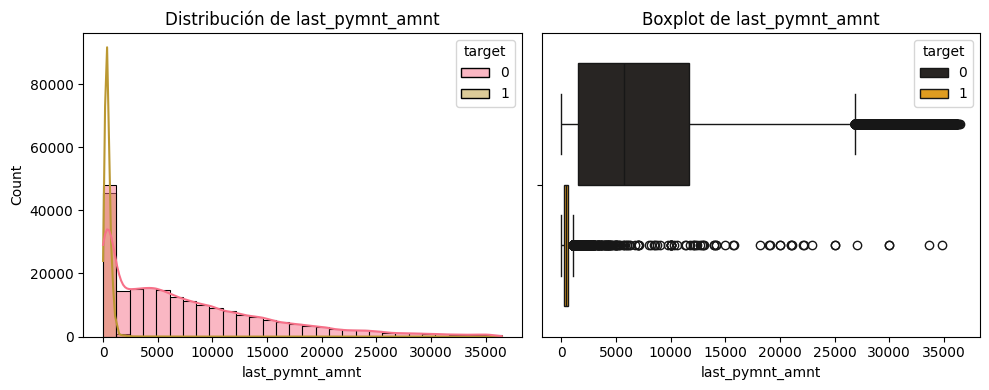

last_pymnt_amnt tiene 8840 outliers.


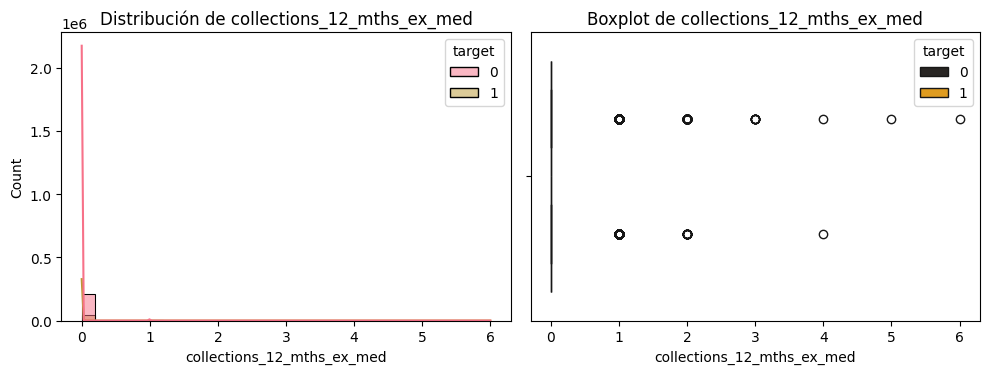

collections_12_mths_ex_med tiene 1593 outliers.


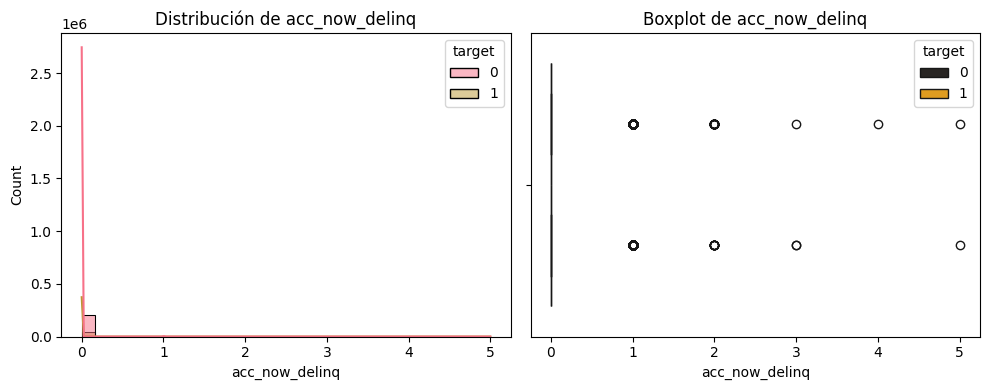

acc_now_delinq tiene 741 outliers.


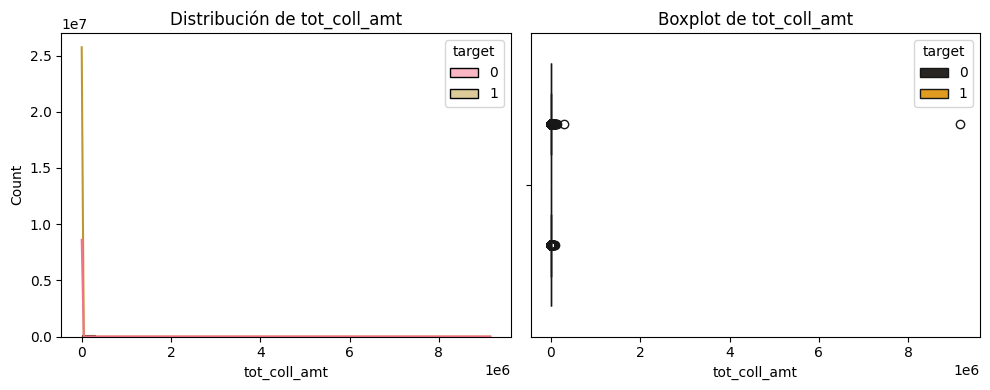

tot_coll_amt tiene 21875 outliers.


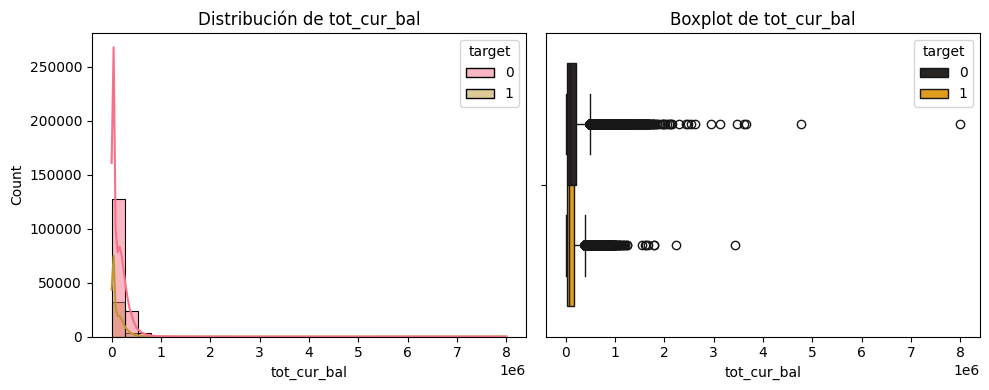

tot_cur_bal tiene 5966 outliers.


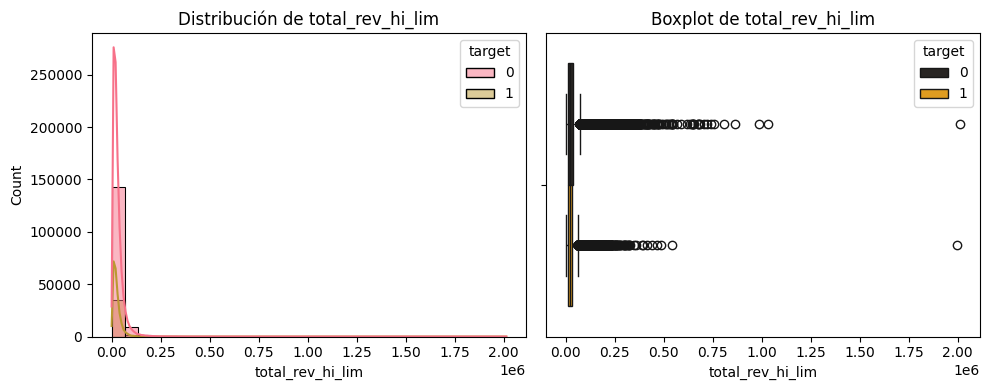

total_rev_hi_lim tiene 10793 outliers.


In [79]:
for col in numerical_columns:
	plt.figure(figsize=(10, 4))
	plt.subplot(1, 2, 1)
	sns.histplot(data=raw_df, x=raw_df[col].dropna(), kde=True, bins=30, color='blue', hue='target')
	plt.title(f'Distribución de {col}')
	plt.subplot(1, 2, 2)
	sns.boxplot(data=raw_df, x=raw_df[col], color='orange', hue='target')
	plt.title(f'Boxplot de {col}')
	plt.tight_layout()
	plt.show()

	# Detect Outliers using IQR
	Q1 = raw_df[col].quantile(0.25)
	Q3 = raw_df[col].quantile(0.75)
	IQR = Q3 - Q1
	outliers = raw_df[(raw_df[col] < Q1 - 1.5 * IQR) | (raw_df[col] > Q3 + 1.5 * IQR)]
	print(f"{col} tiene {len(outliers)} outliers.")

De los gráficos, centrándonos en las personas que incumplen los pagos (target=1), observamos los siguientes:
* Tienen una mediana un poco más alta en la cantidad del préstamo.
* Tienen una mediana más alta en la tasa de interés.
* Tienen una mediana más alta en el índice DTI.
* Tienen una mediana más alta en el número de consultas en los últimos 6 meses.
* Tienen una mediana menor en el número de líneas de crédito abiertas en su archivo de crédito.
* Tienen una mediana ligeramente menor en el total de número de líneas de crédito actuales en su archivo de crédito.
* Tienen una mediana menor en los pagos recibidos hasta la fecha por el monto total financiado.
* Tienen una mediana menor en los pagos recibidos hasta la fecha por el monto total financiado por los inversores.
* Tienen una mediana menor en el principal pendiente restante para el monto total financiado y también para el monto total financiado por inversionistas.
* Tienen una mediana menor en el principal recibido hasta la fecha.
* Tienen una mayor desviación en el cargo posterior a la recuperación bruta.
* Tienen una mediana mucho menor en el último importe total del pago recibido.
  

### Correlaciones y codependencias

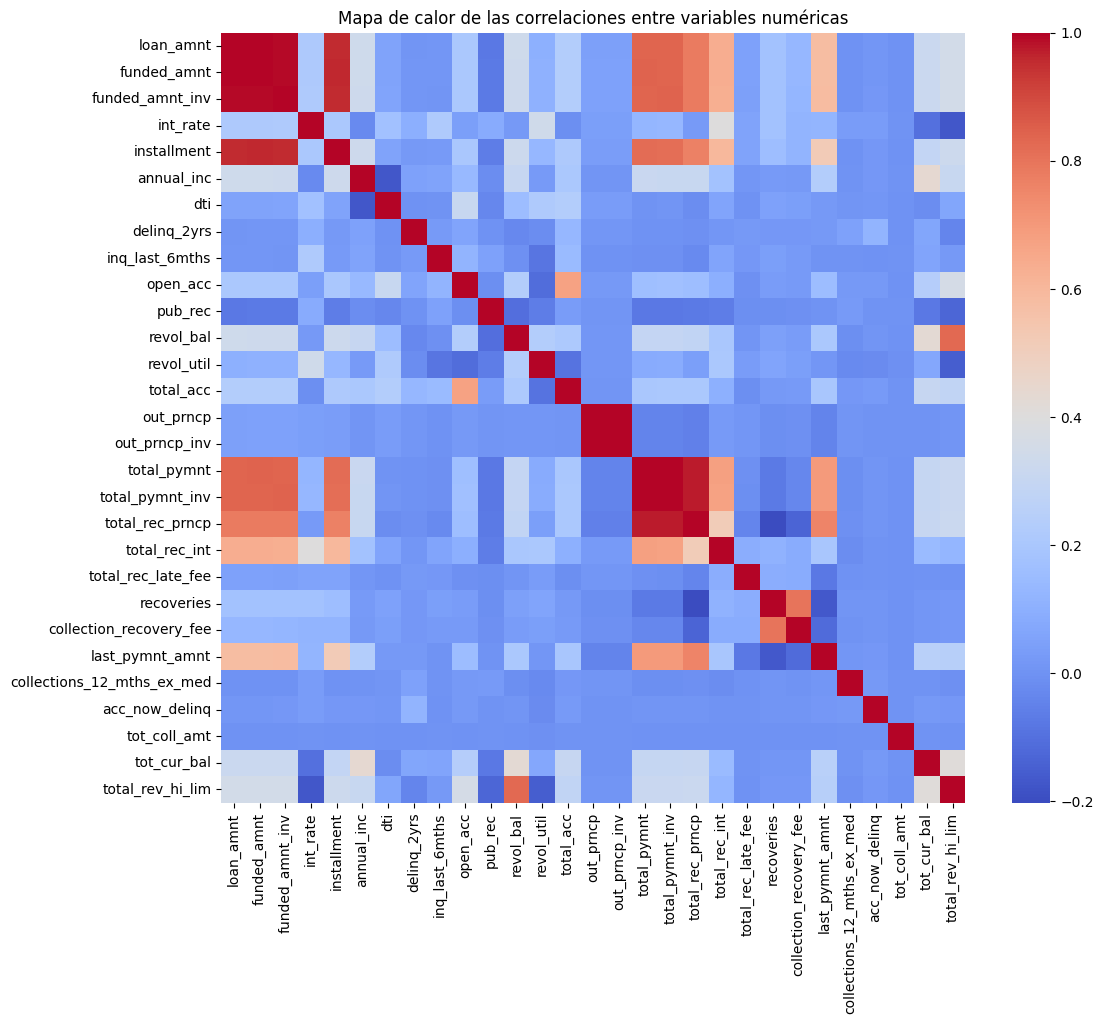

In [80]:
# Correlaciones de variables numéricas
plt.figure(figsize=(12, 10))
correlation_matrix = raw_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de las correlaciones entre variables numéricas')
plt.show()

Podemos evidenciar una alta correlación lineal positiva entre:
* Cantidad del préstamo y cantidad comprometida al préstamo.
* Cantidad del préstamo y cantidad comprometida por los inversionistas al préstamo.
* El pago mensual adeudado por el prestatario y la cantidad del préstamo, cantidad comprometida al préstamo y cantidad comprometida por los inversionistas al préstamo.
* Pagos recibidos hasta la fecha por el monto total financiado y estos mismos pagos por el monto total financiado por inversiores.
* Interés recibido hasta la fecha y los pagos recibidos hasta la fecha por el monto total financiado y estos mismos pagos por el monto total financiado por inversiores.
* Crédito alto rotativo total/límite de crédito y saldo rotativo total del crédito
* Último importe total del pago recibido y principal recibido hasta la fecha

También podemos evidenciar una alta correlación lineal negativa entre:
* Principal recibido hasta la fecha y principal pendiente restante para el monto total financiado y el monto total financiado por inversores.
* Último importe total del pago recibido y principal pendiente restante para el monto total financiado y el monto total financiado por inversores.

In [81]:
from sklearn.feature_selection import mutual_info_classif
X = raw_df[numerical_columns].fillna(0)
y = raw_df['target'].astype(int)
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)
mi_scores = pd.Series(mi_scores, index=numerical_columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
total_rec_prncp               0.440529
last_pymnt_amnt               0.274813
recoveries                    0.188301
collection_recovery_fee       0.176716
total_pymnt                   0.119766
total_pymnt_inv               0.113546
int_rate                      0.031531
installment                   0.019702
total_rec_late_fee            0.011924
total_rec_int                 0.011866
funded_amnt                   0.009032
out_prncp_inv                 0.008935
loan_amnt                     0.008778
out_prncp                     0.008489
dti                           0.007605
funded_amnt_inv               0.007420
revol_util                    0.005886
inq_last_6mths                0.005190
annual_inc                    0.004295
open_acc                      0.002682
total_rev_hi_lim              0.002675
tot_cur_bal                   0.002332
pub_rec                       0.001535
delinq_2yrs                   0.001125
revol_bal                     0.00087

Podemos apreciar que las variables que tienen mayor relación con la variable target son: _total_rec_prncp_ y _last_pymnt_amnt_ . Estas variables pueden ser claves para predicir el default.

Por otro lado, variables como _tot_coll_amt_, _collections_12_mths_ex_med_, _acc_now_delinq_ tienen porcentajes muy cercanos a cero, por lo que su influencia en la variable target es mínima, así que son candidatas a eliminarlas del modelo.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                       feature           VIF
0                    loan_amnt  8.147820e+02
1                  funded_amnt  3.281749e+03
2              funded_amnt_inv  2.352421e+03
3                     int_rate  1.343800e+01
4                  installment  5.758053e+01
5                   annual_inc  3.318495e+00
6                          dti  6.986545e+00
7                  delinq_2yrs  1.182463e+00
8               inq_last_6mths  1.847745e+00
9                     open_acc  1.209559e+01
10                     pub_rec  1.156989e+00
11                   revol_bal  4.256656e+00
12                  revol_util  8.393164e+00
13                   total_acc  1.083096e+01
14                   out_prncp  5.669674e+05
15               out_prncp_inv  5.669675e+05
16                 total_pymnt  9.685160e+13
17             total_pymnt_inv  2.402443e+03
18             total_rec_prncp  7.092283e+13
19               total_rec_int  2.854897e+12
20          total_rec_late_fee  1.066408e+07
21        

**Características con alta colinealidad:**

_out_prncp_ (5.66e+05) y _out_prncp_inv_ (5.66e+05) tienen un VIF extremadamente alto, lo que indica una colinealidad casi perfecta entre ellas.

_total_pymnt_ (9.8e+13) y _total_rec_prncp_ (7.1e+13) también tienen VIFs muy elevados. Esto sugiere que estas variables están altamente correlacionadas con otras características.

Problema: Estas variables redundantes no aportan nueva información y pueden dificultar el ajuste de un modelo al generar multicolinealidad.

**Características con colinealidad moderada:**

_total_pymnt_inv_ (2.4e+03), _funded_amnt_ (3.2e+03), y _funded_amnt_inv_ (2.3e+03) tienen valores altos, pero no tan extremos. Estas características podrían ser parcialmente redundantes entre sí.

**Características con baja colinealidad:**

_tot_coll_amt_ (1.00), _collections_12_mths_ex_med_ (1.02), y _acc_now_delinq_ (1.02) tienen valores muy cercanos a 1, indicando que son independientes de las demás variables.

### Características más importantes

In [83]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

raw_df.drop(columns=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], inplace=True)
raw_df["target"] = raw_df["target"].astype(object)
raw_df.dropna(inplace=True)

In [85]:
num_cols = raw_df.select_dtypes(include=['float', 'int']).columns
cat_cols = raw_df.select_dtypes(include=['object']).columns 
cat_cols = cat_cols.drop('target')

In [86]:
# Transformar variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(raw_df[cat_cols]),
                        columns=encoder.get_feature_names_out(cat_cols))
transformed_df = pd.concat([raw_df.drop(columns=cat_cols), df_encoded], axis=1)

In [87]:
# Normalización de variables numéricas
scaler = StandardScaler()
transformed_df[num_cols] = scaler.fit_transform(transformed_df[num_cols])

In [88]:
transformed_df.dropna(inplace=True)

In [89]:
transformed_df.shape

(72944, 66)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = transformed_df.drop(columns=['target'])
y = transformed_df['target'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [94]:
# Obtener las importancias de las características
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
feature_importances.sort_values(by='Importancia', ascending=False, inplace=True)

In [95]:
print("\nTop 20 características más importantes:\n")
print(feature_importances.head(20))


Top 20 características más importantes:

                   Variable  Importancia
24          last_pymnt_amnt     0.209823
19          total_rec_prncp     0.184670
23  collection_recovery_fee     0.123111
22               recoveries     0.122265
17              total_pymnt     0.070968
18          total_pymnt_inv     0.059738
1               funded_amnt     0.050389
2           funded_amnt_inv     0.044079
0                 loan_amnt     0.039475
4               installment     0.036296
20            total_rec_int     0.015497
3                  int_rate     0.009635
21       total_rec_late_fee     0.006858
12                revol_bal     0.002971
7                       dti     0.002835
16            out_prncp_inv     0.002656
5                annual_inc     0.002201
15                out_prncp     0.002100
28              tot_cur_bal     0.001959
29         total_rev_hi_lim     0.001866


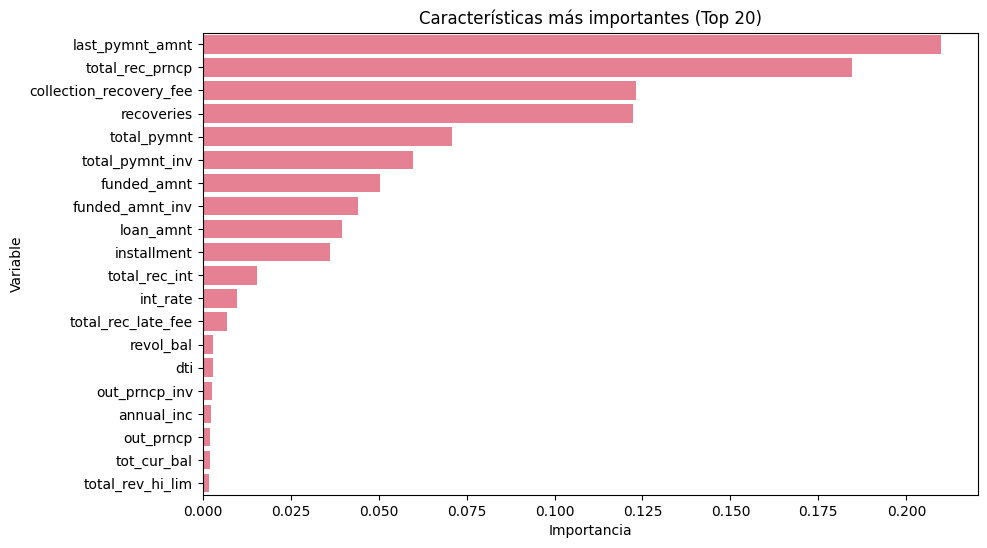

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importances.head(20))
plt.title('Características más importantes (Top 20)')
plt.show()

Las características con una alta importancia en la predicción de la variable target son:
* last_pymnt_amnt: Último importe total del pago recibido
* total_rec_prncp: Principal recibido hasta la fecha
* collection_recovery_fee: Carga posterior a la tarifa de cobro
* recoveries: Cargo posterior a la recuperación bruta
* total_pymnt: Pagos recibidos hasta la fecha por parte del monto total financiado
* total_pymnt_inv: Pagos recibidos hasta la fecha por parte del monto total financiado por los inversores
* funded_amnt: Cantidad comprometida al préstamo 
* funded_amnt_inv: Cantidad comprometida por los inversionistas para el préstamo

Otras variables que también tienen una importancia media en la predicción son:
* loan_amnt: Cantidad del préstamo 
* installment: El pago mensual adeudado por el prestatario si se origina el préstamo
* total_rec_int: Intereses recibidos hasta la fecha

## Análisis de Variables

El último tema a analizar es cuáles variables usar en el modelado. Existen dos tipos de información en nuestros datos:
- Información no prospectiva: Está disponible al momento de tomar la decisión de si se otorga el crédito o no.
- Información prospectiva: No está disponible hasta el momento de tomar la decisión de si se otorga el crédito o no.

A partir de esta idea, podemos dividir las posibles variables en:
1. Variables Auto-reportadas o Directamente Declaradas por el Solicitante (Fáciles de conocer y reportar por el propio cliente)
- annual_inc
  - Descripción: Ingresos anuales que el solicitante declara.
  - Facilidad: Muy fácil, el solicitante conoce y reporta esta cifra.
- emp_length
  - Descripción: Tiempo que lleva trabajando el solicitante (por ejemplo, “10+ años”).
  - Facilidad: Muy fácil, se declara en la solicitud.
- home_ownership
  - Descripción: Estado de tenencia de la vivienda (RENT, OWN, MORTGAGE, OTHER).
  - Facilidad: Muy fácil, es información personal directa.
- purpose
  - Descripción: Motivo del préstamo (por ejemplo, consolidación de deudas, tarjeta de crédito, etc.).
  - Facilidad: Muy fácil, el cliente lo selecciona o lo declara al solicitar el crédito.
- zip_code
  - Descripción: Ubicación geográfica (código postal) del solicitante.
  - Facilidad: Muy fácil, se declaran en la solicitud.

2. Variables Derivadas del Reporte Crediticio (Buró de Crédito)
(Muy importantes para el análisis de riesgo, pero de conocimiento más técnico; el cliente puede tener una idea aproximada, pero no siempre conoce el valor exacto sin consultar su reporte)

- loan_amnt
  - Descripción: Monto que el solicitante pide prestado.
  - Facilidad: Difícil, ya que se define luego de la aprobación.
- term
  - Descripción: Plazo o número de cuotas solicitadas (por ejemplo, 36 o 60 meses).
  - Facilidad: Difícil, ya que se define luego de la aprobación.
- dti
  - Descripción: Ratio deuda/ingresos, calculado a partir de los ingresos y deudas reportadas.
  - Facilidad: Moderada; el cliente sabe sus ingresos y deudas, pero el valor exacto se obtiene a través de un cálculo interno o del buró.
- delinq_2yrs
  - Descripción: Número de morosidades de más de 30 días en los últimos 2 años.
  - Facilidad: Difícil; esta información proviene del historial crediticio y no suele ser de conocimiento detallado para el solicitante.
- inq_last_6mths
  - Descripción: Número de consultas de crédito realizadas en los últimos 6 meses.
  - Facilidad: Difícil; es un dato técnico que aparece en el reporte crediticio.
- open_acc
  - Descripción: Número de cuentas de crédito actualmente abiertas.
  - Facilidad: Moderada; se extrae del historial crediticio, por lo que el solicitante puede no conocerlo en detalle.
- pub_rec
  - Descripción: Número de registros públicos negativos (derogatorios) en el historial.
  - Facilidad: Difícil; forma parte del reporte crediticio y no suele ser consultado directamente por el solicitante.
- total_acc
  - Descripción: Total de líneas de crédito (cuentas) que aparecen en el historial crediticio.
  - Facilidad: Difícil; es un dato consolidado del buró de crédito.

In [102]:
features_subset1 = ["annual_inc", "emp_length", "home_ownership", "purpose", "zip_code", "dti", "open_acc", "target"]
subset1 = raw_df[features_subset1]

In [103]:
subset1.head()

,annual_inc,emp_length,home_ownership,purpose,zip_code,dti,open_acc,target
42538,40000.0,10+ years,RENT,debt_consolidation,871,16.94,7.0,0
42544,25000.0,10+ years,RENT,debt_consolidation,322,24.68,5.0,0
42546,325000.0,5 years,MORTGAGE,debt_consolidation,945,18.55,15.0,0
42549,100000.0,10+ years,MORTGAGE,credit_card,493,22.18,14.0,0
42552,98000.0,10+ years,RENT,debt_consolidation,117,6.15,16.0,0


In [105]:
subset1.dtypes

annual_inc        float64
emp_length         object
home_ownership     object
purpose            object
zip_code            int32
dti               float64
open_acc          float64
target             object
dtype: object

In [114]:
subset1.isnull().sum()

annual_inc        0
emp_length        0
home_ownership    0
purpose           0
zip_code          0
dti               0
open_acc          0
target            0
dtype: int64

In [108]:
num_cols = subset1.select_dtypes(include=['float', 'int']).columns
cat_cols = subset1.drop(columns=["target"]).select_dtypes(include=['object']).columns 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Rellenar valores nulos en categóricas antes de codificar
subset1_clean = subset1.copy()
subset1_clean[cat_cols] = subset1_clean[cat_cols].fillna('missing')

# Aplicar codificación
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
df_encoded = pd.DataFrame(
    encoder.fit_transform(subset1_clean[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=subset1_clean.index  # Mantener índices consistentes
)

# Concatenar preservando índices
transformed_df = pd.concat(
    [subset1_clean.drop(columns=cat_cols), df_encoded], 
    axis=1
)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalización de variables numéricas
scaler = StandardScaler()
transformed_df[num_cols] = scaler.fit_transform(transformed_df[num_cols])

In [123]:
transformed_df.shape

(182305, 32)

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = transformed_df.drop(columns=['target'])
y = transformed_df['target'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
import pickle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

with open(os.path.join('..', 'models', 'base_model.pkl'), 'wb') as file:
	pickle.dump(model, file)

In [126]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     29457
           1       0.27      0.02      0.03      7004

    accuracy                           0.80     36461
   macro avg       0.54      0.50      0.46     36461
weighted avg       0.70      0.80      0.73     36461



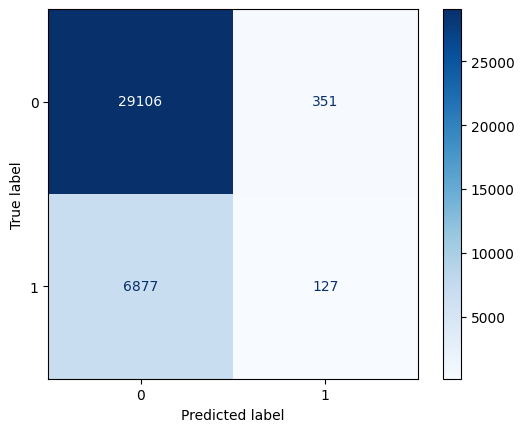

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [130]:
subset1_clean.to_csv(os.path.join('..', 'data', 'output', 'loan_cleaned.csv'), index=False)